In [ ]:
!sudo apt-get install python3.7
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --config python3
!sudo apt install python3-pip
!python -m pip install --upgrade --force-reinstall pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7 python3.7-minimal
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,530 kB of archives.
After this operation, 23.3 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.7-minimal amd64 3.7.16-1+focal1 [588 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-minimal amd64 3.7.16-1+focal1 [1,808 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.7-stdlib amd64 3.7.16-1+focal1 [1,773 kB]
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7 amd64 3.

In [ ]:
!sudo apt-get install --reinstall python3.7-distutils



In [ ]:
#!python -m pip install --upgrade --force-reinstall pip
!pip install tensorflow-gpu==1.15

In [ ]:
!git clone https://github.com/ivishalanand/Federated-Learning-on-Hospital-Data.git


Cloning into 'Federated-Learning-on-Hospital-Data'...
remote: Enumerating objects: 47, done.
remote: Total 47 (delta 0), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (47/47), 315.65 KiB | 9.28 MiB/s, done.


In [ ]:
%cd '/content/Federated-Learning-on-Hospital-Data'

/content/Federated-Learning-on-Hospital-Data


In [ ]:

!pip install tensorflow==1.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==1.* (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==1.*


In [8]:
import fitz  # PyMuPDF
import pandas as pd
import re

# List of known state names
states = ["Andhra Pradesh", "Delhi", "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jammu & Kashmir", "Jharkhand", "Karnataka", "Kerala"]

def extract_data_from_pdf(pdf_path, states_list):
    data = []
    pdf = fitz.open(pdf_path)
    current_state = None

    for page_num in range(pdf.page_count):
        page = pdf.load_page(page_num)
        text = page.get_text("text")

        # Check if we can detect a state name on this page
        for state in states_list:
            if state in text:
                current_state = state
                break

        # Extract each industry code and corresponding 27 characteristics
        industry_matches = re.findall(r"(\d+)\s+([\d\s.-]+)", text)
        for match in industry_matches:
            industry_code = match[0]
            characteristics = list(map(float, match[1].split()))

            # Ensure we have exactly 27 characteristics
            if len(characteristics) == 27:
                row = [industry_code, current_state] + characteristics
                data.append(row)

    # Create a DataFrame and save to Excel
    columns = ["Industry Code", "State Name"] + [f"Characteristic {i+1}" for i in range(27)]
    df = pd.DataFrame(data, columns=columns)
    df.to_excel("extracted_state_data.xlsx", index=False)
    print("Data extraction complete. File saved as 'extracted_state_data.xlsx'.")

# Use the function to extract data
extract_data_from_pdf("/content/Document4.pdf", states)


AttributeError: module 'fitz' has no attribute 'open'

In [6]:
import pdfplumber
import pandas as pd
import re

# List of known states and empty list to store data
states = ["Andhra Pradesh", "Delhi", "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jammu & Kashmir", "Jharkhand", "Karnataka", "Kerala"]
data = []
current_state = None

# Open the PDF
with pdfplumber.open("Document4.pdf") as pdf:
    for page_num, page in enumerate(pdf.pages):
        text = page.extract_text()

        # Debugging output to verify what text is extracted from each page
        print(f"Page {page_num + 1} Text:")
        print(text[:500])  # Display the first 500 characters to check the text structure

        # Identify the state at the start of the page
        for state in states:
            if state in text:
                current_state = state
                print(f"Current State Identified: {current_state}")  # Debug: Show identified state
                break

        # Prepare containers for characteristics and values
        characteristics = []
        industry_code_values = []

        # Parse lines
        lines = text.split('\n')
        for line in lines:
            # Detect characteristics (e.g., "1. Number of Factories")
            characteristic_match = re.match(r"^\d+\.\s+(.+)", line)
            if characteristic_match:
                characteristic = characteristic_match.group(1).strip()
                characteristics.append(characteristic)
                print(f"Characteristic Found: {characteristic}")  # Debug: Show each characteristic

            # Detect industry codes and values
            industry_match = re.match(r"^(All|\d{3})\s+([\d\s.,-]+)", line)
            if industry_match:
                industry_code = industry_match.group(1)
                values = re.findall(r"[-\d.,]+", industry_match.group(2))

                # Confirm values match characteristics count
                if len(values) == len(characteristics):
                    # Convert values to float, handling commas
                    values = [float(value.replace(",", "")) if value else None for value in values]
                    row = {"3-digit industry group: NIC-2008": industry_code, "State": current_state}
                    row.update({char: val for char, val in zip(characteristics, values)})
                    data.append(row)
                    print(f"Row Added: {row}")  # Debug: Show each row added

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv("extracted_industry_data_debug.csv", index=False)
print("Data extraction complete. Check 'extracted_industry_data_debug.csv' for results.")
#extract_data_from_pdf("/content/Document4.pdf", states, characteristics_labels)


Page 1 Text:
Table 2: Estimate of selected characteristics of factory sector by 3-digit industry group (NIC-2008) for each State/UT
Andhra Pradesh (Values in ‘ Lakh unless otherwise mentioned)
3-digit industry group: NIC-2008
Characteristics
All 016 089 101 102 103 104 105 106 107
1. Number of Factories (no.) 16246 610 4 9 91 190 399 390 3369 944
2. Factories in Operation (no.) 13084 558 3 9 89 169 223 339 2661 792
3. Fixed Capital 18632079 41066 816 18777 132235 42966 245864 78050 229061 354841
4. Physical 
Current State Identified: Andhra Pradesh
Characteristic Found: Number of Factories (no.) 16246 610 4 9 91 190 399 390 3369 944
Characteristic Found: Factories in Operation (no.) 13084 558 3 9 89 169 223 339 2661 792
Characteristic Found: Fixed Capital 18632079 41066 816 18777 132235 42966 245864 78050 229061 354841
Characteristic Found: Physical Working Capital 5212273 73441 2 4013 125958 31265 205863 49259 303005 307718
Characteristic Found: Working Capital -198423 60216 -78 2875 

In [12]:
import pandas as pd

# Load the Excel file
file_path = 'ind_data.xlsx'
df = pd.read_excel(file_path, header=None)

# Define the headers for the new structured DataFrame
headers = ["Industrial Code",
           "Number of Factories (no.)", "Factories in Operation (no.)", "Fixed Capital", "Physical Working Capital",
           "Working Capital", "Invested Capital", "Gross Value of Addition to Fixed Capital", "Rent Paid for Fixed Assets",
           "Outstanding Loan", "Interest Paid", "Rent Received for Fixed Assets", "Interest Received",
           "Gross Value of Plant & Machinary", "Value of Product and By-Product", "Total Output", "Fuels Consumed",
           "Materials Consumed", "Total Inputs", "Gross Value Added", "Depreciation", "Net Value Added",
           "Net Fixed Capital Formation", "Gross Fixed Capital Formation", "Addition in Stock of (Materials,Fuels etc.)",
           "Addition in Stock of (Semi Finished Goods)", "Addition in Stock of (Finished Goods)", "Gross Capital Formation",
           "Income", "Profit"]

# Create an empty DataFrame with the headers for structured data
structured_data = pd.DataFrame(columns=headers)

# Iterate through the DataFrame row by row to identify and extract sections
for i in range(len(df)):
    row = df.iloc[i]

    # Check if the row contains the keyword 'characteristics' (case insensitive)
    if row.astype(str).str.contains('characteristics', case=False, na=False).any():
        # Assume the row with 'characteristics' keyword contains industrial codes and following rows contain data
        industrial_codes = row.dropna().tolist()[1:]  # Get industrial codes from the row, excluding 'characteristics' label

        # Extract the next 27 rows as characteristic values for each industrial code
        for j, code in enumerate(industrial_codes):
            values = []
            for k in range(27):  # We expect exactly 27 characteristics
                value_row = df.iloc[i + k + 1].dropna().tolist()

                # Extract the j-th value from each row for this industrial code
                if len(value_row) > j:
                    values.append(value_row[j])
                else:
                    values.append(None)  # If value is missing, add None

            # Ensure row_data matches the expected column count
            row_data = [code] + values
            if len(row_data) < len(headers):
                row_data.extend([None] * (len(headers) - len(row_data)))  # Pad with None if not enough values

            # Append the row to structured_data if the length matches
            if len(row_data) == len(headers):
                structured_data.loc[len(structured_data)] = row_data

# Save the structured data to a new Excel file
output_file_path = 'structured_data_output.xlsx'
structured_data.to_excel(output_file_path, index=False)
print(f"Data extraction complete. Structured file saved as '{output_file_path}'.")


Data extraction complete. Structured file saved as 'structured_data_output.xlsx'.


In [123]:
import pandas as pd

# Load the CSV file
file_path = 'table_2.csv'
df = pd.read_csv(file_path, header=None)

# Define headers for the output CSV file
headers = ["State", "Industrial Code",
           "Number of Factories (no.)",
           "Factories in Operation (no.)",
           "Fixed Capital", "Physical Working Capital",
           "Working Capital", "Invested Capital",
           "Gross Value of Addition to Fixed Capital",
           "Rent Paid for Fixed Assets",
           "Outstanding Loan", "Interest Paid", "Rent Received for Fixed Assets",
           "Interest Received", "Gross Value of Plant & Machinary",
           "Value of Product and By-Product", "Total Output",
           "Fuels Consumed",
           "Materials Consumed", "Total Inputs",
           "Gross Value Added", "Depreciation", "Net Value Added",
           "Net Fixed Capital Formation", "Gross Fixed Capital Formation",
           "Addition in Stock of","(Materials,Fuels etc.)",
           "Addition in Stock of (Semi Finished Goods)",
           "Addition in Stock of (Finished Goods)",
           "Gross Capital Formation", "Income", "Profit"]
#print(df)
print(df[0][1])
output_data = pd.DataFrame(columns=headers)

state=''
print(df[4][1])
#print(df.head)
import pandas as pd

# Load the CSV file into a DataFrame


# Convert the entire DataFrame to a list of lists
data_as_list = df.values.tolist()

print(data_as_list)

data_as_list[0]


Andhra Pradesh
nan
[['Table 2: Estimate of selected characteristics of factory sector by 3-digit industry group (NIC-2008) for each State/UT', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['Andhra Pradesh', '(Values in ` Lakh unless otherwise mentioned)', nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, nan, nan, nan, '3-digit industry group: NIC-2008', nan, nan, nan, nan, nan, nan], ['Characteristics', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 'All', '16', '89', '101', '102', '103', '104', '105', '106', '107'], ['1. Number of Factories (no.)', '16246', '610', '4', '9', '91', '190', '399', '390', '3369', '944'], ['2. Factories in Operation (no.)', '13084', '558', '3', '9', '89', '169', '223', '339', '2661', '792'], ['3. Fixed Capital', '18632079', '41066', '816', '18777', '132235', '42966', '245864', '78050', '229061', '354841'], ['4. Physical Working Capital', '5212273', '73441', '2', '4013', '125958', '31265', '205863', '49259', '303005', '307718'], ['5. Worki

['Table 2: Estimate of selected characteristics of factory sector by 3-digit industry group (NIC-2008) for each State/UT',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [124]:
print(data_as_list[5][1])

table_data = [headers]
num_rows = 5000  # Adjust this based on your requirements
num_cols = 37  # Based on the headers you mentioned (State + Industrial Code + 30 characteristics)

# Initialize table_data with each cell as an empty list
table_data = [[[] for _ in range(num_cols)] for _ in range(num_rows)]
x=len(data_as_list[1])
print(x)

16246
11


In [70]:
print(table_data[0][0])


[]


In [91]:
temp_value=data_as_list[5][2]
print(temp_value)
#table_data[1][2]=str(temp_value)

610


In [98]:
print(len(data_as_list[0][1]))

TypeError: object of type 'float' has no len()

In [143]:
index=1
row_index = 1
col_index = 1
st_temp=1
table_count=4
j=1
i=table_count
count=1
row_wise=2
ind_code=[]
z=0
state=data_as_list[st_temp][0]
print(state)
while index < 6327:
  state= data_as_list[index][0]
  state_len=len(state)
  if state_len <1:
    print("state not found")
    break

    #print("processing state" + str(state))
    #print(data_as_list[38][0])
  z+=1
  print("Currently processing table " + str(z) + " of state " + str(state))
  j=1
  while j <11:
    i=table_count
    ind_code= data_as_list[i][j]
    print(ind_code)
    if not ind_code:
      print("No industrial code found at table_count")
      break

    table_data[count][0]=state
    table_data[count][1]=ind_code
        #table_data[count][0].append(state)
        #table_data[count][1].append(ind_code)
    i+=1
    kk=i+30
        #print("initial value of i" + str(i))
    row_wise=2
    while i < kk:
      #print("value of i and J")
            #print(i)
            #print(j)
      temp_value=data_as_list[i][j]
            #print(count)
            #print(row_wise)
            #print(temp_value)
      table_data[count][row_wise]=temp_value
      row_wise+=1
      i+=1
    count+=1
    j+=1
    print(table_data[count])
  index=index+37

  st_temp=st_temp+37
  table_count=table_count+37




Andhra Pradesh
Currently processing table 1 of state Andhra Pradesh
All
['Andhra Pradesh', '16', '610', '558', '41066', '73441', '60216', '114507', '8336', '392', '50653', '8618', '253', '286', '5741', '151985', '338980', '4461', '143476', '319922', '19058', '4565', '14493', '2690', '7255', '9231', '9561', '0', '-330', '16486', '6022', '186', [], [], [], [], []]
16
['Andhra Pradesh', '89', '4', '3', '816', '2', '-78', '818', '14', '41', '0', '0', '0', '0', '6', '269', '347', '50', '4', '177', '170', '23', '146', '-10', '14', '0', '0', '0', '0', '13', '106', '-1', [], [], [], [], []]
89
['Andhra Pradesh', '101', '9', '9', '18777', '4013', '2875', '22790', '10736', '29', '3521', '1474', '0', '32', '7549', '34784', '35151', '1281', '30284', '34017', '1134', '1100', '34', '1256', '2355', '1073', '218', '-4', '859', '3428', '-1436', '-2694', [], [], [], [], []]
101
['Andhra Pradesh', '102', '91', '89', '132235', '125958', '73465', '258193', '40183', '759', '114987', '17322', '122', '1555', 

In [144]:
import csv

# Assume `table_data` contains your data
# For example:
# table_data = [
#     ['West Bengal', '302', '146', '138', '81543', ...],
#     ['West Bengal', '304', '5', '5', '239', ...],
#     # Thousands of more entries
# ]

# Define column headers
columns = [
    "State", "Industrial Code", "Number of Factories (no.)",
    "Factories in Operation (no.)", "Fixed Capital", "Physical Working Capital",
    "Working Capital", "Invested Capital", "Gross Value of Addition to Fixed Capital",
    "Rent Paid for Fixed Assets", "Outstanding Loan", "Interest Paid",
    "Rent Received for Fixed Assets", "Interest Received", "Gross Value of Plant & Machinary",
    "Value of Product and By-Product", "Total Output", "Fuels Consumed",
    "Materials Consumed", "Total Inputs", "Gross Value Added", "Depreciation",
    "Net Value Added", "Net Fixed Capital Formation", "Gross Fixed Capital Formation",
    "Addition in Stock of (Materials,Fuels etc.)", "Addition in Stock of (Semi Finished Goods)",
    "Addition in Stock of (Finished Goods)", "Gross Capital Formation", "Income", "Profit",
    "Extra Column 1", "Extra Column 2", "Extra Column 3", "Extra Column 4", "Extra Column 5"
]

# Specify the output file path
output_file_path = 'large_table_data.csv'

# Write the data to CSV
with open(output_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(columns)  # Write header row
    writer.writerows(table_data)  # Write all data rows

print(f"Data has been successfully saved to {output_file_path}")


Data has been successfully saved to large_table_data.csv


In [35]:
import pandas as pd

# Load the CSV file
file_path = '/content/2021_2022_workers.csv'
df = pd.read_csv(file_path, header=None)

# Define headers for the output CSV file

headers = ["State", "Industrial Code","No. of Persons Engaged (no.)","Workers","Directly Employed","Men"
           "Women","Employed Through Contractors","Employees Other Than Workers","Supervisory and Managerial"
           "Other Employees","Unpaid family members/proprietor etc","Total Mandays Employed (in '000)"
           "Wages and Salaries Including","Wages and Salary Including Bonus","Wages and Salary","Supervisory & Managerial"
           "Other Employees","Bonus to All Staff","Employers' Contribution"]

#print(df)
print(df[0][1])
output_data = pd.DataFrame(columns=headers)

state=''
print(df[4][1])
print(df.head)
import pandas as pd

# Load the CSV file into a DataFrame


# Convert the entire DataFrame to a list of lists
data_as_list = df.values.tolist()

print(data_as_list)

data_as_list[0]
print(output_data.head)


nan
nan
<bound method NDFrame.head of                                           0   \
0                                        NaN   
1                                        NaN   
2                             Andhra Pradesh   
3                                        NaN   
4                                        NaN   
...                                      ...   
4811                   1.1.3 Other Employees   
4812                                     1.2   
4813                                       2   
4814  Annual Survey of Industries, 2021-2022   
4815                          Factory Sector   

                                                     1   \
0     Table 4: Estimate of (i) employment, (ii) mand...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                       Characteristics   
...                            

In [4]:
"""
No. of Persons Engaged (no.)
Workers
Directly Employed
Men
Women
Employed Through Contractors
Employees Other Than Workers
Supervisory and Managerial
Other Employees
Unpaid family members/proprietor etc
Total Mandays Employed (in '000)
Wages and Salaries Including
Wages and Salary Including Bonus
Wages and Salary
Supervisory & Managerial
Other Employees
Bonus to All Staff
Employers' Contribution
"""

"\nNo. of Persons Engaged (no.)\nWorkers\nDirectly Employed\nMen\nWomen\nEmployed Through Contractors\nEmployees Other Than Workers\nSupervisory and Managerial\nOther Employees\nUnpaid family members/proprietor etc\nTotal Mandays Employed (in '000)\nWages and Salaries Including\nWages and Salary Including Bonus\nWages and Salary\nSupervisory & Managerial\nOther Employees\nBonus to All Staff\nEmployers' Contribution\n"

In [36]:
print(data_as_list[5][1])

table_data = [headers]
num_rows = 3000  # Adjust this based on your requirements
num_cols = 22  # Based on the headers you mentioned (State + Industrial Code + 30 characteristics)

# Initialize table_data with each cell as an empty list
table_data = [[[] for _ in range(num_cols)] for _ in range(num_rows)]
x=len(data_as_list[1])
print(x)

nan
12


In [37]:
import numpy as np
i=3
j = 1
ind_code = data_as_list[i][j]

if (isinstance(ind_code, float) and np.isnan(ind_code)) and j == 1:
    print("NaN found")


NaN found


In [8]:
xx='Other'
if (isinstance(xx, float) and np.isnan(xx)):
  print("NaN found")

In [38]:
import numpy as np
index=2
row_index = 1
col_index = 1
st_temp=1
table_count=5
j=2
i=table_count
count=1
row_wise=2
ind_code=[]
z=0
state=data_as_list[st_temp][0]
print(state)
while index < 4816:
  state= data_as_list[index][0]
  state_len=len(state)
  if state_len <1:
    print("state not found")
    break

    #print("processing state" + str(state))
    #print(data_as_list[38][0])
  z+=1
  print("Currently processing table " + str(z) + " of state " + str(state))
  j=2
  while j <12:
    i=table_count
    ind_code= data_as_list[i][j]
    print(ind_code)
    #mm=j+1
    #if mm==12:
     # mm=11
      #ind_ext=data_as_list[i][mm]
    #else:
     # ind_ext=data_as_list[i][mm]
    if (isinstance(ind_code, float) and np.isnan(ind_code)) and j == 2:
      print("NaN found")
      ind_code  = data_as_list[i][1]
    table_data[count][0]=state
    table_data[count][1]=ind_code

    print(table_data[count][0])
    print(table_data[count][1])
        #table_data[count][0].append(state)
        #table_data[count][1].append(ind_code)
    i+=1
    kk=i+20
        #print("initial value of i" + str(i))
    row_wise=2
    empty=i+12
    while i < kk:
      #print("value of i and J")
            #print(i)
            #print(j)
      #if i==empty:
       # i+=1
        #continue
      temp_value=data_as_list[i][j]
            #print(count)
            #print(row_wise)
            #print(temp_value)
      table_data[count][row_wise]=temp_value
      row_wise+=1
      i+=1
    if ind_code=='Other':
      print("State data completed")
      j=12
    count+=1
    j+=1
    print(table_data[count])
  index=index+28

  st_temp=st_temp+28
  table_count=table_count+28




Streaming output truncated to the last 5000 lines.
Delhi
324
['Delhi', '325', '2315', '1726', '1265', '1060', '205', '461', '574', '173', '401', '15', '629', nan, '9396', '8954', '8696', '3730', '3095', '1871', '258', '442']
325
Delhi
325
['Delhi', '329', '461', '287', '287', '243', '44', '0', '165', '60', '105', '9', '124', nan, '1466', '1341', '1279', '535', '426', '318', '63', '125']
329
Delhi
329
['Delhi', '331', '3708', '1961', '1713', '1696', '17', '248', '1747', '526', '1221', '0', '1135', nan, '18261', '16571', '16217', '5377', '6739', '4101', '354', '1690']
Currently processing table 38 of state Delhi
331
Delhi
331
['Delhi', '581', '68', '57', '54', '54', '0', '3', '11', '8', '3', '0', '19', nan, '409', '347', '333', '194', '128', '11', '13', '62']
581
Delhi
581
['Delhi', 'Other', '16868', '11216', '9553', '9492', '61', '1663', '5647', '1566', '4081', '6', '4847', nan, '57374', '52512', '50293', '25322', '12364', '12607', '2221', '4862']
Other
Delhi
Other
State data completed


In [39]:
import csv

# Assume `table_data` contains your data
# For example:
# table_data = [
#     ['West Bengal', '302', '146', '138', '81543', ...],
#     ['West Bengal', '304', '5', '5', '239', ...],
#     # Thousands of more entries
# ]

# Define column headers
columns =["State", "Industrial Code","No. of Persons Engaged (no.)","Workers","Directly Employed","Men",
           "Women","Employed Through Contractors","Employees Other Than Workers","Supervisory and Managerial",
           "Other Employees","Unpaid family members/proprietor etc","Total Mandays Employed (in '000)",
           "Wages and Salaries Including","Wages and Salary Including Bonus","Wages and Salary","workers","Supervisory & Managerial",
           "Other Employees","Bonus to All Staff","Employers' Contribution"]

# Specify the output file path
output_file_path = '2021_2022_worker_processed.csv'

# Write the data to CSV
with open(output_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(columns)  # Write header row
    writer.writerows(table_data)  # Write all data rows

print(f"Data has been successfully saved to {output_file_path}")


Data has been successfully saved to 2021_2022_worker_processed.csv


In [121]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/table_2.csv'
try:
    data_df_raw = pd.read_csv(file_path)
    data_as_list = data_df_raw.values.tolist()  # Convert to a list of lists for easy processing
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    data_as_list = []

# Define the columns for the final DataFrame
columns = [
    "State", "Industrial Code", "Number of Factories (no.)",
    "Factories in Operation (no.)", "Fixed Capital", "Physical Working Capital",
    "Working Capital", "Invested Capital", "Gross Value of Addition to Fixed Capital",
    "Rent Paid for Fixed Assets", "Outstanding Loan", "Interest Paid",
    "Rent Received for Fixed Assets", "Interest Received", "Gross Value of Plant & Machinary",
    "Value of Product and By-Product", "Total Output", "Fuels Consumed",
    "Materials Consumed", "Total Inputs", "Gross Value Added", "Depreciation",
    "Net Value Added", "Net Fixed Capital Formation", "Gross Fixed Capital Formation",
    "Addition in Stock of (Materials,Fuels etc.)", "Addition in Stock of (Semi Finished Goods)",
    "Addition in Stock of (Finished Goods)", "Gross Capital Formation", "Income", "Profit"
]
data_df = pd.DataFrame(columns=columns)

# Check if data_as_list has data
if not data_as_list:
    print("Error: data_as_list is empty. Please check the data source.")
else:
    print(f"data_as_list has {len(data_as_list)} rows.")

index = 0
st_temp = 1
table_count = 4
count = 0  # Row index for the DataFrame
z = 0

while True:
    try:
        # Get the current state from data_as_list
        state = data_as_list[st_temp][0] if st_temp < len(data_as_list) else None
        if state is None:
            print(f"Ending processing: No state found at st_temp index {st_temp}")
            break

        z += 1
        print(f"Currently processing table {z} for state {state}")

        # Process columns for the current state
        j = 1  # Reset column index for each state
        while j < 11:
            i = table_count
            ind_code = data_as_list[i][j] if i < len(data_as_list) and j < len(data_as_list[i]) else None
            if not ind_code:  # If code is empty, move to the next state
                print(f"Ending column processing: No industrial code found at table_count {table_count}, column {j}")
                break

            # Prepare a row of data to insert into the DataFrame
            row_data = [state, ind_code]
            row_wise = 2  # Start from the third column in the row_data list

            # Extract data for each metric, up to the 30 required fields in this order
            for row_offset in range(30):
                row_index = i + row_offset
                if row_index >= len(data_as_list):  # Ensure row index is within bounds
                    print("Reached end of data_as_list while fetching metrics.")
                    break
                temp_value = data_as_list[row_index][j] if j < len(data_as_list[row_index]) else None
                row_data.append(temp_value)

            # Append row data to the DataFrame
            if len(row_data) == len(columns):
                data_df.loc[count] = row_data  # Add the row to the DataFrame
                count += 1
                print(f"Added row {count} to DataFrame for state {state}, industrial code {ind_code}")

            j += 1  # Move to the next column for the current state

        # Move to the next state after completing all columns for the current state
        st_temp += 37
        table_count += 37

    except IndexError:
        print("Reached the end of data or encountered an index error.")
        break  # Exit the loop if data is exhausted or there's an index error

# Save the DataFrame to CSV if it contains data
if not data_df.empty:
    output_file_path = 'processed_data.csv'
    data_df.to_csv(output_file_path, index=False)
    print(f"Data has been saved to {output_file_path}")
else:
    print("DataFrame is empty after processing. No data was saved.")


CSV file loaded successfully.
data_as_list has 6326 rows.
Currently processing table 1 for state nan
Currently processing table 2 for state nan
Currently processing table 3 for state nan
Currently processing table 4 for state nan
Currently processing table 5 for state nan
Currently processing table 6 for state nan
Currently processing table 7 for state nan
Currently processing table 8 for state nan
Currently processing table 9 for state nan
Currently processing table 10 for state nan
Currently processing table 11 for state nan
Currently processing table 12 for state nan
Currently processing table 13 for state nan
Currently processing table 14 for state nan
Currently processing table 15 for state nan
Currently processing table 16 for state nan
Currently processing table 17 for state nan
Currently processing table 18 for state nan
Currently processing table 19 for state nan
Currently processing table 20 for state nan
Currently processing table 21 for state nan
Currently processing table 

In [ ]:
output_df = pd.DataFrame(table_data[1:], columns=table_data[0])  # Skip headers in data rows
output_file_path = "structured_table_data.csv"
output_df.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")

In [2]:
!pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 65.7 MB/s eta 0:00:00


In [7]:
!pip uninstall -y fitz
!pip install pymupdf


Found existing installation: fitz 0.0.1.dev2
Uninstalling fitz-0.0.1.dev2:
  Successfully uninstalled fitz-0.0.1.dev2


In [ ]:
import urllib.request


In [ ]:
def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()

def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')

In [ ]:
names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data'
diagnosis_names = 'diagnosis.names'
diagnosis_data = 'diagnosis.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)

In [ ]:
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix

In [ ]:
def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

In [ ]:
print_dataset('Train', train_data)


Dataset Train. Shape: (96, 8)
[[41.   1.   1.   1.   1.   1.   1.   1. ]
 [41.4  0.   1.   1.   0.   1.   0.   1. ]
 [37.7  0.   1.   0.   0.   0.   0.   0. ]
 [41.5  0.   1.   1.   0.   1.   0.   1. ]
 [37.8  0.   0.   1.   0.   0.   1.   0. ]
 [41.5  0.   1.   1.   0.   1.   0.   1. ]
 [37.   0.   0.   1.   1.   0.   1.   0. ]
 [37.5  0.   0.   1.   1.   0.   1.   0. ]
 [41.2  1.   1.   0.   1.   0.   0.   1. ]
 [37.2  0.   1.   0.   0.   0.   0.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [41.2  1.   1.   1.   1.   1.   1.   1. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [37.8  0.   1.   0.   0.   0.   0.   0. ]
 [39.7  0.   1.   1.   0.   1.   0.   1. ]
 [40.   1.   1.   0.   1.   0.   0.   1. ]
 [40.4  1.   1.   0.   1.   0.   0.   1. ]
 [40.7  1.   1.   0.   1.   0.   0.   1. ]
 [36.   0.   1.   0.   0.   0.   0.   0. ]
 [37.8  0.   0.   1.   1.   1.   1.   0. ]
 [38.3  0.   1.   1.   0.   1.   0.   1. ]
 [41.   0.   1.   1.   0.   1.   0.   1. ]
 [37.5  0.   1.   0.   0

In [ ]:
print_dataset('Test', test_data)


Dataset Test. Shape: (24, 8)
[[37.5  0.   1.   0.   0.   0.   0.   0. ]
 [40.1  1.   1.   1.   1.   0.   1.   1. ]
 [40.7  1.   1.   1.   1.   1.   1.   1. ]
 [37.2  0.   0.   1.   0.   0.   1.   0. ]
 [41.3  1.   1.   1.   1.   0.   1.   1. ]
 [37.1  0.   0.   1.   0.   0.   1.   0. ]
 [36.6  0.   1.   0.   0.   0.   0.   0. ]
 [40.   0.   0.   0.   0.   0.   0.   0. ]
 [40.8  0.   1.   1.   0.   1.   0.   1. ]
 [37.5  0.   0.   1.   1.   1.   1.   0. ]
 [37.9  0.   1.   0.   0.   0.   0.   0. ]
 [41.1  0.   1.   1.   0.   1.   0.   1. ]
 [40.   0.   0.   0.   0.   0.   0.   0. ]
 [40.3  0.   1.   1.   0.   1.   0.   1. ]
 [36.3  0.   0.   1.   1.   1.   1.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [37.   0.   0.   1.   0.   0.   1.   0. ]
 [36.9  0.   0.   1.   1.   1.   1.   0. ]
 [41.1  1.   1.   1.   1.   0.   1.   1. ]
 [37.3  0.   0.   1.   0.   0.   1.   0. ]
 [41.2  0.   0.   0.   0.   0.   0.   0. ]
 [40.7  1.   1.   1.   1.   0.   1.   1. ]
 [37.6  0.   0.   1.   1.

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
input_size = 6
learning_rate = 0.01
num_iterations = 20000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [ ]:
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)
#to_percent = lambda x: '{:.2f}%'.format(x / n_samples * 100)

to_percent = lambda x: '{:.2f}%'.format(x)

In [ ]:
def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    #n_samples = input.shape[0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output1 = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    output2 = Variable(torch.tensor(data[:, 7], dtype = torch.float32))
    return input, output1, output2

In [ ]:
input, output1, output2 = get_input_and_output(train_data)
test_input, test_output1, test_output2 = get_input_and_output(test_data)


In [ ]:
print(test_input.shape, test_output1.shape)
print(input.shape, output1.shape, output2.shape)
output1 = output1.unsqueeze(1)
output2 = output2.unsqueeze(1)
test_output1 = test_output1.unsqueeze(1)
test_output2 = test_output2.unsqueeze(1)
print(test_input.shape, test_output1.shape)
print(input.shape, output1.shape, output2.shape)

torch.Size([24, 6]) torch.Size([24])
torch.Size([96, 6]) torch.Size([96]) torch.Size([96])
torch.Size([24, 6]) torch.Size([24, 1])
torch.Size([96, 6]) torch.Size([96, 1]) torch.Size([96, 1])


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

diagnosis_title1 = 'Inflammation of Urinary Bladder'
diagnosis_title2 = 'Nephritis of Renal Pelvis Origin'


In [ ]:
def plot_graphs(diagnosis_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

In [ ]:
def train_model(diagnosis_title, input, output, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    losses = []
    accuracies = []
    n_samples, _ = input.shape
    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction, output)
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


iteration=0, loss=3.7338, train_acc=4866.67%
iteration=500, loss=1.2162, train_acc=4900.00%
iteration=1000, loss=0.7937, train_acc=4900.00%
iteration=1500, loss=0.2156, train_acc=4816.67%
iteration=2000, loss=0.1891, train_acc=4802.08%
iteration=2500, loss=0.1711, train_acc=4802.08%
iteration=3000, loss=0.1562, train_acc=4802.08%
iteration=3500, loss=0.1437, train_acc=4802.08%
iteration=4000, loss=0.1331, train_acc=4802.08%
iteration=4500, loss=0.1239, train_acc=4802.08%
iteration=5000, loss=0.1159, train_acc=4802.08%
iteration=5500, loss=0.1089, train_acc=4802.08%
iteration=6000, loss=0.1026, train_acc=4802.08%
iteration=6500, loss=0.0971, train_acc=4802.08%
iteration=7000, loss=0.0921, train_acc=4802.08%
iteration=7500, loss=0.0876, train_acc=4802.08%
iteration=8000, loss=0.0835, train_acc=4802.08%
iteration=8500, loss=0.0798, train_acc=4802.08%
iteration=9000, loss=0.0764, train_acc=4802.08%
iteration=9500, loss=0.0733, train_acc=4802.08%
iteration=10000, loss=0.0704, train_acc=4802

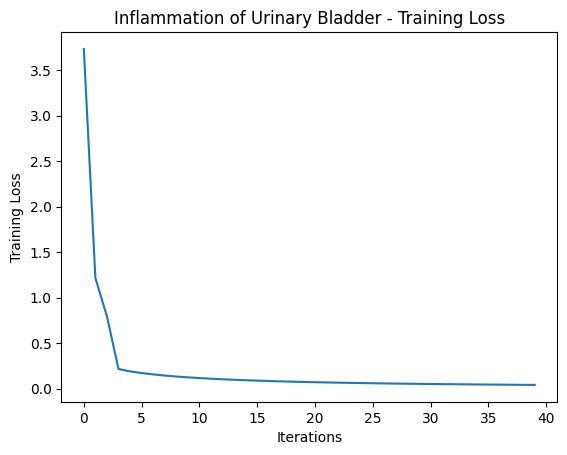

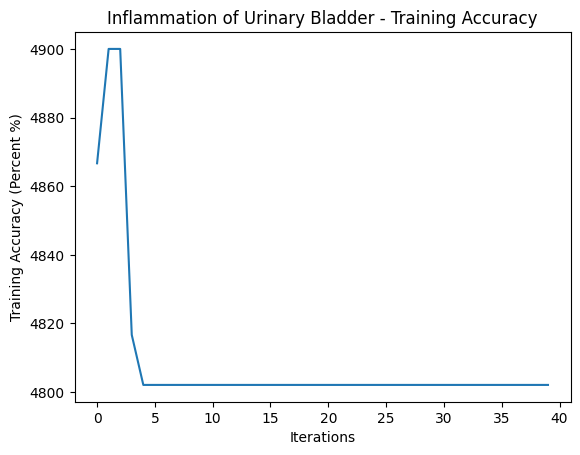


Testing Accuracy = 1200.00%


In [ ]:
model = train_model(diagnosis_title1, input, output1, test_input, test_output1)


iteration=0, loss=4.9011, train_acc=4200.00%
iteration=500, loss=1.6775, train_acc=4200.00%
iteration=1000, loss=1.2836, train_acc=4200.00%
iteration=1500, loss=0.8677, train_acc=4287.50%
iteration=2000, loss=0.4504, train_acc=4462.50%
iteration=2500, loss=0.1874, train_acc=4875.00%
iteration=3000, loss=0.1735, train_acc=4875.00%
iteration=3500, loss=0.1618, train_acc=4875.00%
iteration=4000, loss=0.1516, train_acc=4875.00%
iteration=4500, loss=0.1428, train_acc=4875.00%
iteration=5000, loss=0.1349, train_acc=4875.00%
iteration=5500, loss=0.1280, train_acc=4875.00%
iteration=6000, loss=0.1218, train_acc=4875.00%
iteration=6500, loss=0.1162, train_acc=4875.00%
iteration=7000, loss=0.1111, train_acc=4875.00%
iteration=7500, loss=0.1064, train_acc=4875.00%
iteration=8000, loss=0.1022, train_acc=4875.00%
iteration=8500, loss=0.0982, train_acc=4875.00%
iteration=9000, loss=0.0946, train_acc=4875.00%
iteration=9500, loss=0.0913, train_acc=4875.00%
iteration=10000, loss=0.0882, train_acc=4875

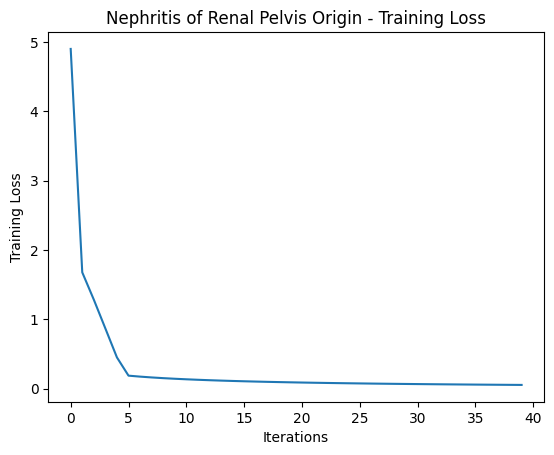

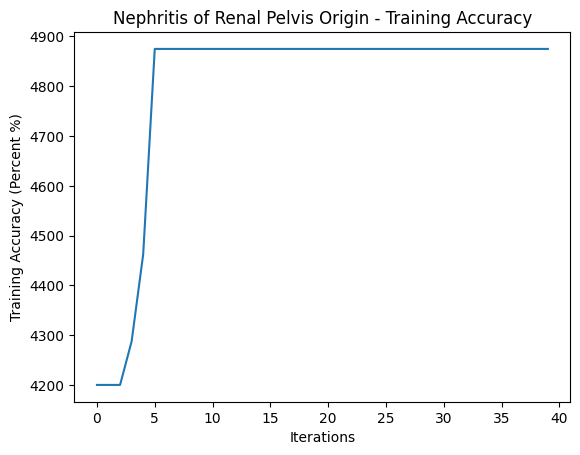


Testing Accuracy = 1333.33%


In [ ]:
model = train_model(diagnosis_title2, input, output2, test_input, test_output2)


In [ ]:
#Federated Learning

In [ ]:
!pip install syft==0.2.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached syft-0.2.9-py3-none-any.whl (433 kB)
  Using cached openmined.threepio-0.2.0.tar.gz (73 kB)
  Preparing metadata (setup.py) ... done
  Using cached aiortc-0.9.28.tar.gz (1.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Using cached Flask_SocketIO-4.2.1-py2.py3-none-any.whl (16 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl (94 kB)
  Using cached importlib_resources-1.5.0-py2.py3-none-any.whl (21 kB)
  Using cached lz4-3.0.2.tar.gz (152 kB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.18.5.zip (5.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached phe-1.4.0.tar.gz (35 kB)
  Preparing metadata (setup.py) ... done
  Using cached psutil-5.7.0.tar.gz (449 kB)
  Preparing metadata (setup.py) ... done


In [ ]:
import syft as sy
import torch as th
hook = sy.TorchHook(th)
from torch import nn, optim


AttributeError: ignored

In [ ]:
n_hospitals = 4
hospitals = []


In [ ]:
for i in range(n_hospitals):
    hospital_name = 'hospital{}'.format(i)
    hospital = sy.VirtualWorker(hook, id = hospital_name)
    hospitals.append(hospital)
secure_worker = sy.VirtualWorker(hook, id="secure_worker")

In [ ]:
def get_workers_names(workers):
    return [worker.id for worker in workers]

def add_and_print_workers(worker, workers):
    print('workers of {} = {}'.format(worker.id, get_workers_names(workers)))
    worker.add_workers(workers)

for i in range(n_hospitals):
    workers = [hospitals[i2] for i2 in range(n_hospitals) if i2 != i] + [secure_worker]
    add_and_print_workers(hospitals[i], workers)
add_and_print_workers(secure_worker, hospitals)

Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker secure_worker already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital0 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker secure_worker already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital0 already exists. Replacing old worker which could cause                     unex

workers of hospital0 = ['hospital1', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital1 = ['hospital0', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital2 = ['hospital0', 'hospital1', 'hospital3', 'secure_worker']
workers of hospital3 = ['hospital0', 'hospital1', 'hospital2', 'secure_worker']
workers of secure_worker = ['hospital0', 'hospital1', 'hospital2', 'hospital3']


In [ ]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets1 = []
hospital_targets2 = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, :6].clone().detach().requires_grad_(True)
    targets1 = train_data2[:, 6][:, None].clone().detach()
    targets2 = train_data2[:, 7][:, None].clone().detach()
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets1.append(targets1.send(hospitals[i]))
    hospital_targets2.append(targets2.send(hospitals[i]))

print(model)

LogisticRegression(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)


In [ ]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

In [ ]:
def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 1000 #2000
worker_iterations = 5


In [ ]:
def federated_learning(diagnosis_title, hospital_features, hospital_targets, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.SGD(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(n_hospitals):
                optimizers[i].zero_grad()
                prediction = models[i](hospital_features[i])
                loss = criterion(prediction, hospital_targets[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.bias.set_(avg_bias.get())
        if iteration % 100 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['1.9069', '1.9583', '1.8771', '1.0122'], accuracies=['45.83%', '41.67%', '45.83%', '62.50%']
Iteration=100, losses=['1.4347', '1.3302', '1.3479', '0.9102'], accuracies=['45.83%', '41.67%', '45.83%', '62.50%']
Iteration=200, losses=['0.9010', '0.8793', '0.7133', '0.7099'], accuracies=['45.83%', '62.50%', '62.50%', '62.50%']
Iteration=300, losses=['0.3528', '0.2908', '0.2139', '0.5220'], accuracies=['79.17%', '87.50%', '100.00%', '62.50%']
Iteration=400, losses=['0.1735', '0.1646', '0.1604', '0.2544'], accuracies=['100.00%', '100.00%', '100.00%', '70.83%']
Iteration=500, losses=['0.1566', '0.1490', '0.1449', '0.1930'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=600, losses=['0.1432', '0.1360', '0.1324', '0.1727'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.1320', '0.1252', '0.1220', '0.1573'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1225', '0.1161', '0.1133', '0.14

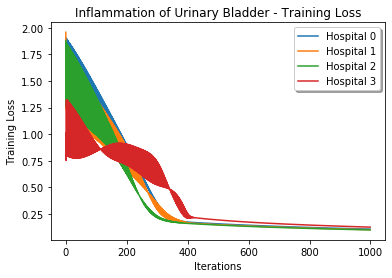

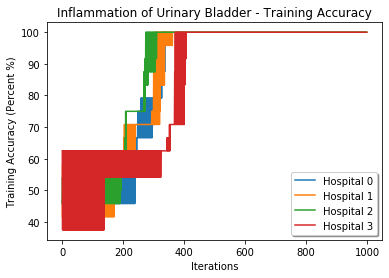


Testing Accuracy = 100.00%


In [ ]:
model = federated_learning(diagnosis_title1, hospital_features, hospital_targets1, test_input, test_output1)


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['0.7428', '0.7255', '0.7145', '1.5871'], accuracies=['62.50%', '62.50%', '70.83%', '58.33%']
Iteration=100, losses=['1.1439', '1.0962', '0.9452', '1.1263'], accuracies=['62.50%', '62.50%', '79.17%', '41.67%']
Iteration=200, losses=['0.8460', '0.7447', '0.3290', '1.1461'], accuracies=['62.50%', '62.50%', '100.00%', '41.67%']
Iteration=300, losses=['0.6430', '0.4999', '0.2837', '0.9953'], accuracies=['62.50%', '62.50%', '87.50%', '62.50%']
Iteration=400, losses=['0.5148', '0.2145', '0.2263', '0.3802'], accuracies=['66.67%', '95.83%', '87.50%', '70.83%']
Iteration=500, losses=['0.2340', '0.1602', '0.1908', '0.2478'], accuracies=['95.83%', '100.00%', '95.83%', '83.33%']
Iteration=600, losses=['0.2104', '0.1482', '0.1729', '0.2218'], accuracies=['100.00%', '100.00%', '100.00%', '83.33%']
Iteration=700, losses=['0.1964', '0.1384', '0.1589', '0.1980'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1845', '0.1300', '0.1473', '0.1808'], a

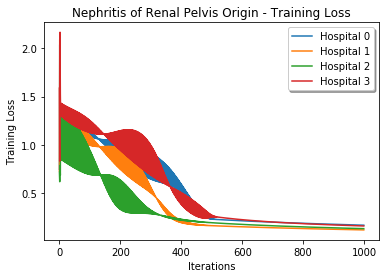

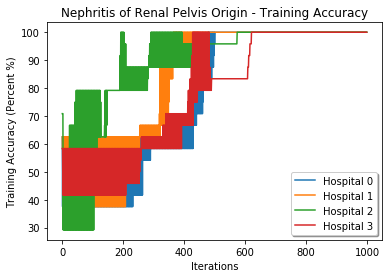


Testing Accuracy = 100.00%


In [ ]:
model = federated_learning(diagnosis_title2, hospital_features, hospital_targets2, test_input, test_output2)
